In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import keras_preprocessing
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
training_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
train_dir = r"C:\Users\USER\Desktop\fruit_classification\fruit_data\Training"
train_gen = training_datagen.flow_from_directory(train_dir,target_size=(100,100),class_mode="categorical")

Found 60498 images belonging to 120 classes.


In [4]:
val_dir = r"C:\Users\USER\Desktop\fruit_classification\fruit_data\Test"
val_gen = validation_datagen.flow_from_directory(val_dir,target_size=(100,100),class_mode="categorical")

Found 20950 images belonging to 120 classes.


In [5]:
import os

In [6]:
train_appleBraeburn_dir = r"C:\Users\USER\Desktop\fruit_classification\fruit_data\Training\Apple Braeburn"
number_applesBraeburn_train = len(os.listdir(train_appleBraeburn_dir))
print("total training Braeburn apple images:", number_applesBraeburn_train)

train_banana_dir = r"C:\Users\USER\Desktop\fruit_classification\fruit_data\Training\Banana"
number_banana_train = len(os.listdir(train_banana_dir))
print("total training Banana images:", number_banana_train)

total training Braeburn apple images: 492
total training Banana images: 490


In [7]:
appleBraeburn_names = os.listdir(train_appleBraeburn_dir)
appleBraeburn_names[:10]

banana_names = os.listdir(train_banana_dir)
banana_names[:10]

['Banana (1).png',
 'Banana (10).png',
 'Banana (100).png',
 'Banana (101).png',
 'Banana (102).png',
 'Banana (103).png',
 'Banana (104).png',
 'Banana (105).png',
 'Banana (106).png',
 'Banana (107).png']

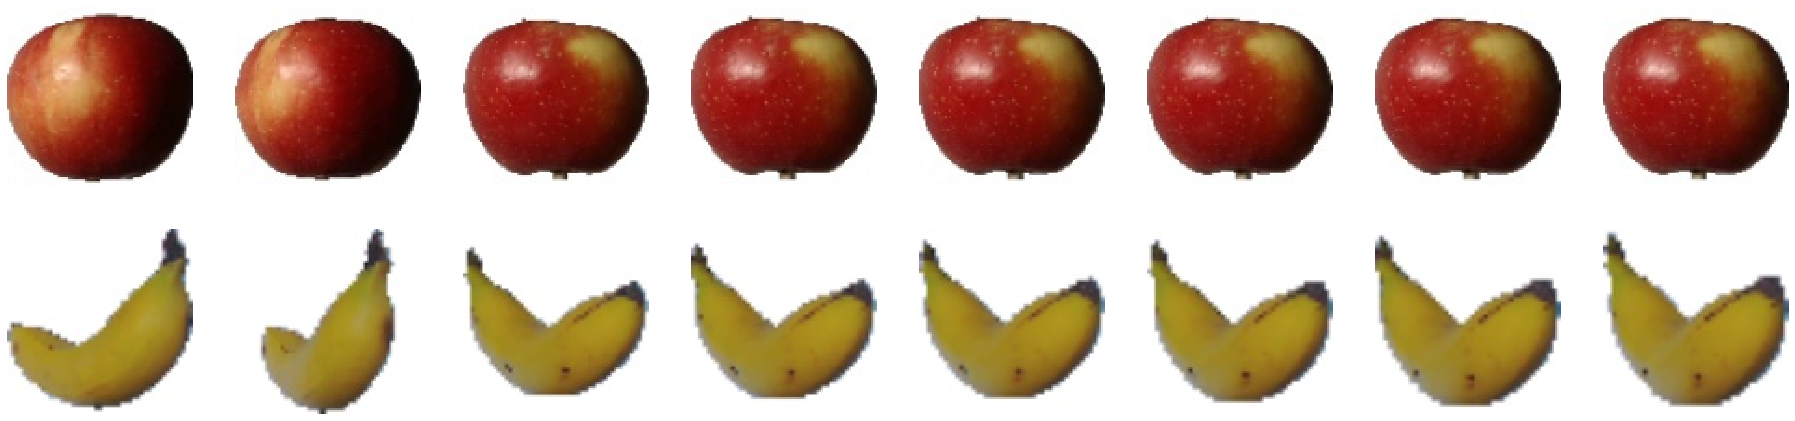

In [8]:
nrows = 8
ncols = 8

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

applesBraeburn_pic = [os.path.join(train_appleBraeburn_dir,fname) for fname in appleBraeburn_names[pic_index-8:pic_index]]
banana_pic = [os.path.join(train_banana_dir,fname) for fname in banana_names[pic_index-8:pic_index]]

for i, img_path in enumerate(applesBraeburn_pic + banana_pic):
    sub = plt.subplot(nrows, ncols, i + 1)
    sub.axis("Off")
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(100,100, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
        
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(120, activation="softmax")
]);

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         7

In [11]:
#labels train dataset classes
#Dense Layer (None,120=Above Classes)

In [12]:
validation_accuracy = 0.92
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy") >= validation_accuracy):
            print("\nReached desired validation accuracy, So cancelling training")
            self.model.stop_training=True  
            
callbacks = myCallback()

In [13]:
filepath = r"C:\Users\USER\Desktop\fruit_classification\fruit_data\Saved_model"
model_saving = tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format="tf",
    signatures=None
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\USER\Desktop\fruit_classification\fruit_data\Saved_model\assets


In [14]:
model.compile(loss = "categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [15]:
model.save("rps.h5")

In [16]:
fruit_model = model.fit(train_gen, epochs=100, validation_data=val_gen, verbose=1, callbacks = [callbacks], workers=10)

filepath = r"C:\Users\USER\Desktop\fruit_classification\fruit_data\Saved_model"
tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format="tf",
    signatures=None
)
model.save("fruit.h5")

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1891 steps, validate for 655 steps
Epoch 1/100
1891/1891 [==============================] - 682s 361ms/step - loss: 1.8472 - accuracy: 0.4922 - val_loss: 0.5423 - val_accuracy: 0.8599
Epoch 2/100
1890/1891 [============================>.] - ETA: 0s - loss: 0.2438 - accuracy: 0.9354
Reached desired validation accuracy, So cancelling training
1891/1891 [==============================] - 731s 386ms/step - loss: 0.2437 - accuracy: 0.9354 - val_loss: 0.3857 - val_accuracy: 0.9132
INFO:tensorflow:Assets written to: C:\Users\USER\Desktop\fruit_classification\fruit_data\Saved_model\assets


In [17]:
fruit_model.history['accuracy']

[0.49224767, 0.9353532]

In [19]:
new_fruit_model = tf.keras.models.load_model(
    "fruit.h5",
    custom_objects=None,
    compile=True
)

In [20]:

"""
loss,acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2}%'.format(100*acc))

DO above code before doing below code when new model is loaded

new_fruit_model.history['acc']

"""

"\nloss,acc = new_model.evaluate(test_images, test_labels, verbose=2)\nprint('Restored model, accuracy: {:5.2}%'.format(100*acc))\n\nDO above code before doing below code when new model is loaded\n\nnew_fruit_model.history['acc']\n\n"

In [21]:
new_fruit_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         7

In [22]:
model_dir = r"C:\Users\USER\Desktop\fruit_classification\fruit_data\Saved_model"

new_fruit_model_v2 = tf.keras.models.load_model(
    model_dir,
    custom_objects=None,
    compile=True
)

In [23]:
new_fruit_model_v2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         7

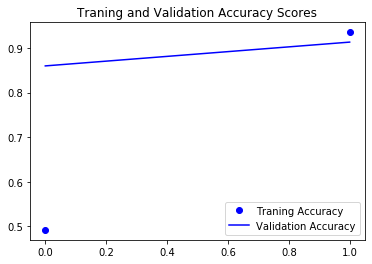

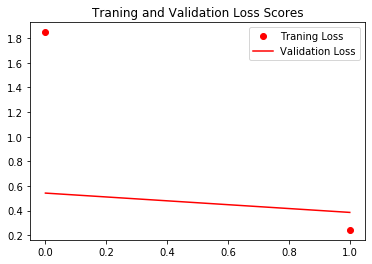

In [37]:
accuracy = fruit_model.history['accuracy']
validation_accuracy = fruit_model.history['val_accuracy']
loss = fruit_model.history['loss']
val_loss = fruit_model.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo' , label = 'Traning Accuracy')
plt.plot(epochs, validation_accuracy, 'b' , label = 'Validation Accuracy')
plt.title('Traning and Validation Accuracy Scores')

plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro' , label = 'Traning Loss')
plt.plot(epochs, val_loss, 'r' , label = 'Validation Loss')
plt.title('Traning and Validation Loss Scores')

plt.legend()
plt.show()

In [38]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_dir = r"C:\Users\USER\Desktop\fruit_classification\fruit_data\test"
test_gen = test_datagen.flow_from_directory(test_dir,target_size=(100,100),class_mode="categorical")

Found 20950 images belonging to 120 classes.


In [46]:
#the dataset has 120 different categories. load a subset of image from each category

appleBraeburn_datagen = ImageDataGenerator(rescale = 1./255)

appleBraeburn_dir =  r"C:\Users\USER\Desktop\fruit_classification\fruit_data\test/AppleBraeburn"

appleBraeburn_gen = appleBraeburn_datagen.flow(appleBraeburn_dir,target_size=(100,100),class_mode="categorical")

TypeError: flow() got an unexpected keyword argument 'target_size'

In [45]:
single_appleBraeburn = r"C:\Users\USER\Desktop\fruit_classification\fruit_data\Test\Apple Braeburn\AppleBareburn (1).png"

model.predict(
    test_gen,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    verbose=0
)

array([[3.3405081e-09, 4.6444157e-08, 8.7748182e-09, ..., 1.1278476e-06,
        2.3081891e-17, 5.5859175e-09],
       [3.0757313e-10, 2.1098453e-17, 2.7248875e-04, ..., 6.0921816e-11,
        2.3646098e-17, 8.9864288e-16],
       [1.7045422e-20, 1.9368628e-13, 4.0586341e-20, ..., 1.2498548e-14,
        3.3331211e-27, 2.4391979e-05],
       ...,
       [5.9844483e-15, 4.1946390e-20, 8.3092984e-11, ..., 1.3967176e-21,
        1.5820281e-24, 1.7659323e-22],
       [1.9266005e-03, 4.7794008e-10, 9.4900060e-11, ..., 3.6349381e-09,
        1.9976616e-11, 2.4401748e-11],
       [4.4983511e-24, 0.0000000e+00, 5.9954531e-28, ..., 3.1772531e-38,
        2.2980466e-27, 0.0000000e+00]], dtype=float32)

In [54]:
import numpy as np
single_appleBraeburn = r"C:\Users\USER\Desktop\fruit_classification\fruit_data\Training\Banana\Banana (1).png"

img = image.load_img(single_appleBraeburn,target_size = (100,100))
array = image.img_to_array(img)
x = np.expand_dims(array, axis=0)

vimage = np.vstack([x])
model.predict(vimage)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [52]:
print(vimage)

[[[[251. 255. 250.]
   [253. 255. 250.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[251. 255. 252.]
   [254. 255. 253.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[251. 255. 254.]
   [254. 255. 255.]
   [255. 253. 254.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]]
